<h1>pyMagicStats</h1>
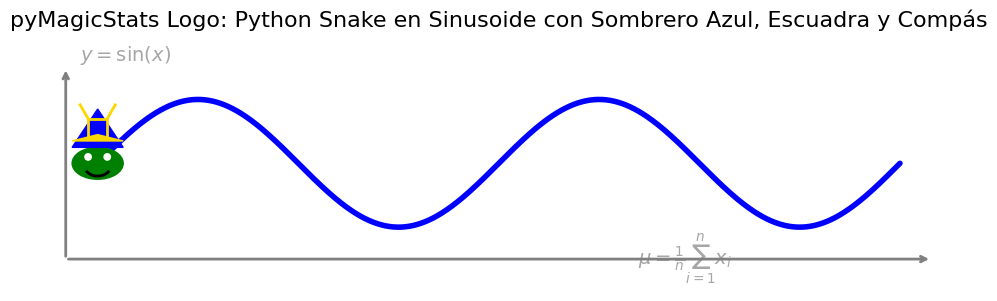

In [129]:
# Configuración inicial para cargar el proyecto y limpiar la caché
import sys
import os
from importlib import reload
import shutil
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
# Ruta al directorio raíz del proyecto
PROJECT_ROOT = r'C:\Users\ehudb\OneDrive\Desktop\pyMagicStat\pyMagicStat'

# Asegurarse de que el proyecto está en sys.path
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)

# Ruta al directorio pyMagicStat
PYMAGICSTAT_PATH = os.path.join(PROJECT_ROOT, 'pyMagicStat')

# Limpiar caché de módulos
def clean_pycache():
    pycache_path = os.path.join(PYMAGICSTAT_PATH, '__pycache__')
    if os.path.exists(pycache_path):
        shutil.rmtree(pycache_path)
        print(f"Eliminado caché en: {pycache_path}")
    else:
        print("No se encontró caché para limpiar.")

clean_pycache()

# Limpiar módulos cargados previamente
MODULES_TO_CLEAR = [
    "pyMagicStat.distributions",
    "pyMagicStat.confidence_intervals",
    "pyMagicStat.utils",
    "pyMagicStat.distributionOrchestrator",
    "pyMagicStat.nonParametricHTest"
]

for module in MODULES_TO_CLEAR:
    if module in sys.modules:
        del sys.modules[module]

# Importar módulos principales
import pyMagicStat.lib.utils as utils
import pyMagicStat.Classes.confidence_intervals as ci
import pyMagicStat.Classes.distributions as dist
import pyMagicStat.Classes.nonParametricHTest 


# Recargar módulos para reflejar cambios
reload(ci)
reload(dist)
reload(utils)


# Importar clases específicas necesarias
from pyMagicStat.Classes.confidence_intervals import (
    ConfidenceIntervals,
    NormalDistConfidenceIntervals,
    PopulationMeanCI,
    PopulationProportionCI,
    PopulationVarianceCI,
    
)
from pyMagicStat.Classes.distributions import (
    
    Distribution,
    NormalDistribution,
    BinomialDistribution,
    PoissonDistribution,
    LognormalDistribution,
    DistributionValidator,
    ContinuousDistributionValidator,
    DiscreteDistributionValidator
)

from pyMagicStat.Classes.nonParametricHTest import (
    BootstrapConfidenceIntervals,
    BootstrapMeanCI,
    BootstrapMedianCI,
    BootstrapVarianceCI,
    #BootstrapProportionCI,
    #NonParametricHTest
)

from pyMagicStat.lib.utils import output_format


# Validación del entorno
print("Módulos pyMagicStat cargados y listos para usar.")


No se encontró caché para limpiar.
Módulos pyMagicStat cargados y listos para usar.


In [130]:
df = pd.read_excel(r'C:\Users\ehudb\OneDrive\SuperStoreUS-2015 1.xlsx')

In [131]:
df.head(15)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2015-01-07,2015-01-08,4.5600,4,13.01,88522
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,West,California,San Gabriel,91776,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,...,East,New Jersey,Roselle,7203,2015-02-15,2015-02-17,-53.8096,22,211.15,90192
3,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-14,803.4705,16,1164.45,86838
4,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-13,-24.0300,7,22.23,86838
5,24847,Medium,0.05,3.28,4.20,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-13,-37.0300,4,13.99,86838
6,24848,Medium,0.05,3.58,1.63,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-13,-0.7100,4,14.26,86838
7,18181,Critical,0.00,4.42,4.99,15,Timothy Reese,Regular Air,Small Business,Office Supplies,...,East,New York,Smithtown,11787,2015-04-08,2015-04-09,-59.8200,7,33.47,86837
8,20925,Medium,0.01,35.94,6.66,15,Timothy Reese,Regular Air,Small Business,Office Supplies,...,East,New York,Smithtown,11787,2015-05-28,2015-05-28,261.8757,10,379.53,86839
9,26267,High,0.04,2.98,1.58,16,Sarah Ramsey,Regular Air,Small Business,Office Supplies,...,East,New York,Syracuse,13210,2015-02-12,2015-02-15,2.6300,6,18.80,86836


In [132]:
n = BootstrapMeanCI(df['Shipping Cost'], 0.95, 10000).calculate_interval()

In [133]:
n

{'lb': np.float64(12.937986680327853), 'ub': np.float64(12.987633196721298)}

In [134]:
df['Shipping Cost'].mean()

np.float64(12.9681506147541)

In [135]:
for cat in df['Product Category'].unique():
    print(cat)
    print(df[df['Product Category'] == cat]['Shipping Cost'].mean())
    print(BootstrapMeanCI(df[df['Product Category'] == cat]['Shipping Cost'], 0.95, 10000).calculate_interval())
    print('-----------------------------------')

Office Supplies
7.890242763772176
{'lb': np.float64(7.858394024276381), 'ub': np.float64(7.8973576097105544)}
-----------------------------------
Furniture
30.7956
{'lb': np.float64(30.709675), 'ub': np.float64(30.868725000000005)}
-----------------------------------
Technology
9.44935550935551
{'lb': np.float64(9.413804573804576), 'ub': np.float64(9.465779625779627)}
-----------------------------------


In [136]:
y = Distribution(df['Shipping Cost'])
x = NormalDistribution(y)
x.evaluate_normality()


{'KS': {'statistic': np.float64(0.26552934584910226),
  'p_value': np.float64(5.59639776513194e-122)},
 'Shapiro': {'statistic': np.float64(0.6639478679859467),
  'p_value': np.float64(3.1577323018904554e-52)},
 "D'Agostino": {'statistic': np.float64(1165.1424523247651),
  'p_value': np.float64(9.829494003412158e-254)},
 'Anderson': {'statistic': np.float64(221.88564731508723),
  'critical_values': [0.575, 0.655, 0.785, 0.916, 1.09],
  'significance_levels': [15.0, 10.0, 5.0, 2.5, 1.0]},
 'QQ': {'slope': np.float64(14.197882480591618),
  'intercept': np.float64(12.968150614754121),
  'p_value_slope': np.float64(0.0),
  'p_value_intercept': np.float64(0.0)}}

In [137]:
z = LognormalDistribution(y)
z.evaluate_normality()
print(y.type)
print(f"La Distribucion es Normal ? {y.type['Normal']}")
print(f"La Distribucion es Lognormal ? {y.type['Lognormal']}")

#hay que terminar de implementar . 
# idea de implementar metodos para teoria de lo que se esta haciendo 
#y.distribution_vizualization()

{'Normal': np.False_, 'normality_results': {'KS': {'statistic': np.float64(0.26552934584910226), 'p_value': np.float64(5.59639776513194e-122)}, 'Shapiro': {'statistic': np.float64(0.6639478679859467), 'p_value': np.float64(3.1577323018904554e-52)}, "D'Agostino": {'statistic': np.float64(1165.1424523247651), 'p_value': np.float64(9.829494003412158e-254)}, 'Anderson': {'statistic': np.float64(221.88564731508723), 'critical_values': [0.575, 0.655, 0.785, 0.916, 1.09], 'significance_levels': [15.0, 10.0, 5.0, 2.5, 1.0]}, 'QQ': {'slope': np.float64(14.197882480591618), 'intercept': np.float64(12.968150614754121), 'p_value_slope': np.float64(0.0), 'p_value_intercept': np.float64(0.0)}}, 'Lognormal': True, 'normality_log_results': {'KS': {'statistic': np.float64(0.06900022911026854), 'p_value': np.float64(1.588991478248878e-08)}, 'Shapiro': {'statistic': np.float64(0.9840168382179918), 'p_value': np.float64(5.801777333850473e-14)}, "D'Agostino": {'statistic': np.float64(16.474102675206463), '

In [138]:

rx = NormalDistConfidenceIntervals(df['Shipping Cost'])
yv = PopulationMeanCI(rx.data, 0.95)
yv.calculate_interval()['lb'], yv.calculate_interval()['ub']

(np.float64(12.943434006950303), np.float64(12.992867222557896))

In [139]:

def categoryCICalc(data):
    categorical_df = {}
    for cat in data['Product Category'].unique():
        m = data[data['Product Category'] == cat]['Shipping Cost']
        n = BootstrapConfidenceIntervals(np.array(m), 0.95, 10000)
        y = BootstrapMeanCI(n.data, 0.95, 10000).calculate_interval()
        p = BootstrapVarianceCI(n.data, 0.95, 10000).calculate_interval()
        j = BootstrapMedianCI(n.data, 0.95, 10000).calculate_interval()
        print(f"{cat} Mean: {y['lb']} - {y['ub']}")
        print(f"{cat} Variance: {p['lb']} - {p['ub']}")
        print(f"{cat} Median: {j['lb']} - {j['ub']}")
        categorical_df   =  [
                                {'Category': cat, 'Mean': np.mean(m), 'Lower_bound': y['lb'] ,'Upper_bound': y['ub']},
                                {'Category': cat, 'Variance':np.var(m), 'Lower_bound': p['lb'], 'Upper_bound': p['ub']},
                                {'Category': cat, 'Median':np.median(m), 'Lower_bound': j['lb'], 'Upper_bound': j['ub']}
                                
        ]    
        categorical_df
        

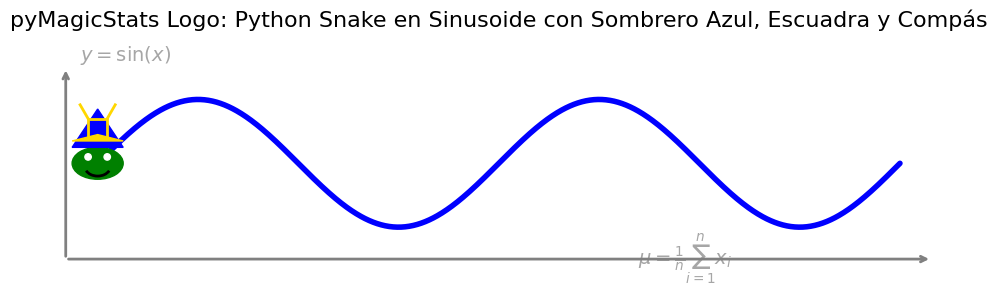

In [140]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

# Generar datos para la sinusoide (cuerpo de la serpiente)
x = np.linspace(0, 4 * np.pi, 1000)
y = np.sin(x)

fig, ax = plt.subplots(figsize=(12, 6))

# Ajustar límites para que se vea bien la gráfica y los ejes decorativos
x_min = x[0]
x_max = x[-1]
ax.set_xlim(-1, x_max+1)
ax.set_ylim(-2, 2)

# Dibujar ejes decorativos en el fondo (con flechas)
ax.annotate("",
            xy=(x_max+0.5, -1.5), xytext=(x_min-0.5, -1.5),
            arrowprops=dict(arrowstyle="->", color="gray", lw=2),
            zorder=1)
ax.annotate("",
            xy=(-0.5, 1.5), xytext=(-0.5, -1.5),
            arrowprops=dict(arrowstyle="->", color="gray", lw=2),
            zorder=1)

# Agregar ecuaciones decorativas (notación LaTeX)
ax.text(0.05, 0.9, r"$y=\sin(x)$", transform=ax.transAxes,
        fontsize=14, color='gray', alpha=0.7)
ax.text(0.65, 0.1, r"$\mu = \frac{1}{n}\sum_{i=1}^{n} x_i$", transform=ax.transAxes,
        fontsize=14, color='gray', alpha=0.7)

# Dibujar la sinusoide (cuerpo de la serpiente)
ax.plot(x, y, color='blue', linewidth=4, solid_capstyle='round', zorder=3)

# Dibujar la cabeza de la serpiente al inicio de la sinusoide
head_index = 0  # posición inicial
head_x = x[head_index]
head_y = y[head_index]
head_width = 0.8
head_height = 0.5
snake_head = patches.Ellipse((head_x, head_y), width=head_width, height=head_height,
                             color='green', zorder=5)
ax.add_patch(snake_head)

# Agregar ojos a la cabeza
eye_radius = 0.05
eye_offset_x = 0.15
eye_offset_y = 0.1
left_eye = patches.Circle((head_x - eye_offset_x, head_y + eye_offset_y), eye_radius,
                          color='white', zorder=6)
right_eye = patches.Circle((head_x + eye_offset_x, head_y + eye_offset_y), eye_radius,
                           color='white', zorder=6)
ax.add_patch(left_eye)
ax.add_patch(right_eye)

# Dibujar la sonrisa con un arco
smile = patches.Arc((head_x, head_y - 0.05), width=0.4, height=0.3,
                    angle=0, theta1=200, theta2=340, color='black', linewidth=2, zorder=6)
ax.add_patch(smile)

# Dibujar el sombrero de mago sobre la cabeza (ahora en azul)
hat_base_width = 0.8
hat_height = 0.6
hat_coords = [
    (head_x - hat_base_width/2, head_y + head_height/2),  # base izquierda
    (head_x + hat_base_width/2, head_y + head_height/2),  # base derecha
    (head_x, head_y + head_height/2 + hat_height)         # vértice superior
]
wizard_hat = patches.Polygon(hat_coords, closed=True, color='blue', zorder=7)
ax.add_patch(wizard_hat)

# Agregar banda decorativa en el sombrero (opcional, se puede omitir o modificar)
band_height = 0.1
band_coords = [
    (head_x - hat_base_width/2, head_y + head_height/2 + band_height),
    (head_x + hat_base_width/2, head_y + head_height/2 + band_height),
    (head_x, head_y + head_height/2 + band_height*2)
]
hat_band = patches.Polygon(band_coords, closed=True, color='gold', zorder=8)
ax.add_patch(hat_band)

# Incorporar la escuadra y el compás en el interior del sombrero
# Definir centro del sombrero (área de dibujo)
hat_center_x = head_x
hat_center_y = head_y + head_height/2 + hat_height/2

# Dibujar la escuadra: un cuadrado pequeño
square_size = 0.3
square_lower_left = (hat_center_x - square_size/2, hat_center_y - square_size/2)
escuadra = patches.Rectangle(square_lower_left, square_size, square_size, 
                             linewidth=2, edgecolor='gold', facecolor='none', zorder=9)
ax.add_patch(escuadra)

# Dibujar el compás: dos brazos saliendo de la parte superior del cuadrado
arm_length = 0.25
# Desde la esquina superior izquierda del cuadrado (para el brazo izquierdo)
start_left = (hat_center_x - square_size/2, hat_center_y + square_size/2)
angle_left = np.deg2rad(120)  # 120 grados
end_left = (start_left[0] + arm_length * np.cos(angle_left),
            start_left[1] + arm_length * np.sin(angle_left))
ax.plot([start_left[0], end_left[0]], [start_left[1], end_left[1]], color='gold', linewidth=2, zorder=10)

# Desde la esquina superior derecha del cuadrado (para el brazo derecho)
start_right = (hat_center_x + square_size/2, hat_center_y + square_size/2)
angle_right = np.deg2rad(60)  # 60 grados
end_right = (start_right[0] + arm_length * np.cos(angle_right),
             start_right[1] + arm_length * np.sin(angle_right))
ax.plot([start_right[0], end_right[0]], [start_right[1], end_right[1]], color='gold', linewidth=2, zorder=10)

# Configuración final y título
plt.title("pyMagicStats Logo: Python Snake en Sinusoide con Sombrero Azul, Escuadra y Compás", fontsize=16)
ax.axis('off')
ax.set_aspect('equal')
plt.show()
